In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#from tensorflow.data.Dataset import load
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd

import os
from file_helpers import unpickle_from_file

2024-03-11 19:41:35.361035: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_labels_sorted = unpickle_from_file('../data/processed_data/train_labels_sorted.bin')

In [3]:
#Read training data
batch_size = 32
img_height = 227
img_width = 227

train_ds = tf.keras.utils.image_dataset_from_directory(
  '../data/processed_data/training_images',
  validation_split=0.15,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
labels = train_labels_sorted)

Found 51957 files belonging to 8 classes.
Using 44164 files for training.


2024-03-11 19:41:40.705724: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
#Read validation data

val_ds = tf.keras.utils.image_dataset_from_directory(
  '../data/processed_data/training_images',
  validation_split=0.15,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
labels = train_labels_sorted)

Found 51957 files belonging to 8 classes.
Using 7793 files for validation.


In [5]:
#Try to keep things in memory for performance reasons
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
img_height = 227
img_width = 227

num_classes = 8

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
epochs=10

#Silence debug messages for cleaner output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/10


2024-03-11 19:41:44.134449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [44164]
	 [[{{node Placeholder/_4}}]]
2024-03-11 19:41:44.135195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [44164]
	 [[{{node Placeholder/_0}}]]


1381/1381 [==============================] - ETA: 0s - loss: 0.6637 - accuracy: 0.8269

2024-03-11 20:20:01.572880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7793]
	 [[{{node Placeholder/_0}}]]
2024-03-11 20:20:01.574711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7793]
	 [[{{node Placeholder/_4}}]]


1381/1381 [==============================] - 2343s 2s/step - loss: 0.6637 - accuracy: 0.8269 - val_loss: 1.1040 - val_accuracy: 0.7672
Epoch 2/10
1381/1381 [==============================] - 2244s 2s/step - loss: 0.4818 - accuracy: 0.8600 - val_loss: 1.2939 - val_accuracy: 0.7616
Epoch 3/10
1381/1381 [==============================] - 2194s 2s/step - loss: 0.3859 - accuracy: 0.8819 - val_loss: 1.5931 - val_accuracy: 0.7489
Epoch 4/10
1381/1381 [==============================] - 2293s 2s/step - loss: 0.3037 - accuracy: 0.9026 - val_loss: 1.8568 - val_accuracy: 0.6983
Epoch 5/10
1381/1381 [==============================] - 2344s 2s/step - loss: 0.2410 - accuracy: 0.9204 - val_loss: 2.4737 - val_accuracy: 0.7412
Epoch 6/10
1381/1381 [==============================] - 2369s 2s/step - loss: 0.1903 - accuracy: 0.9343 - val_loss: 2.9277 - val_accuracy: 0.7326
Epoch 7/10
1381/1381 [==============================] - 2408s 2s/step - loss: 0.1485 - accuracy: 0.9490 - val_loss: 2.9007 - val_accura

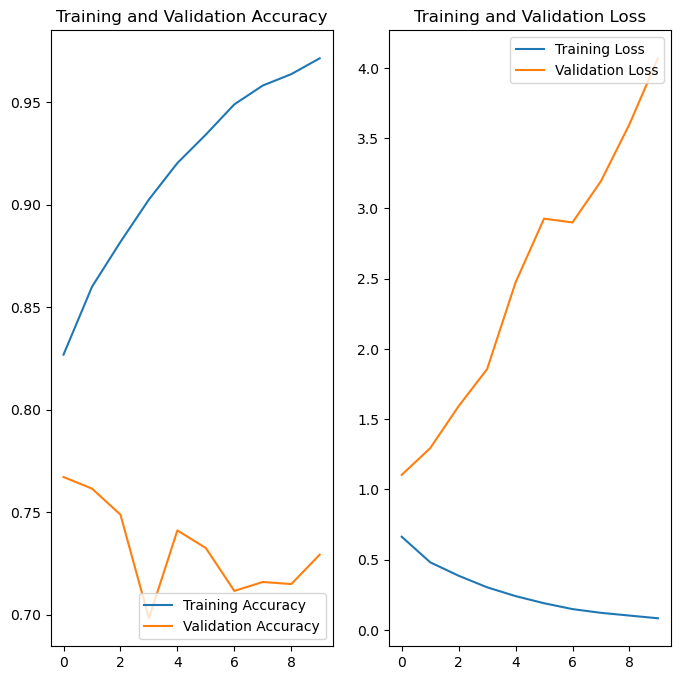

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
predictions = model.predict(val_ds)

244/244 [==============================] - 41s 166ms/step


In [11]:
predictions[0]

array([ 13.665128 ,  -1.3294067,  -5.7249312,   1.8741233, -18.64482  ,
        -8.051583 , -17.760569 , -10.883172 ], dtype=float32)

In [12]:
np.argmax(predictions[0])

0

2024-03-12 04:15:48.528059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [44164]
	 [[{{node Placeholder/_0}}]]
2024-03-12 04:15:48.529772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [44164]
	 [[{{node Placeholder/_4}}]]


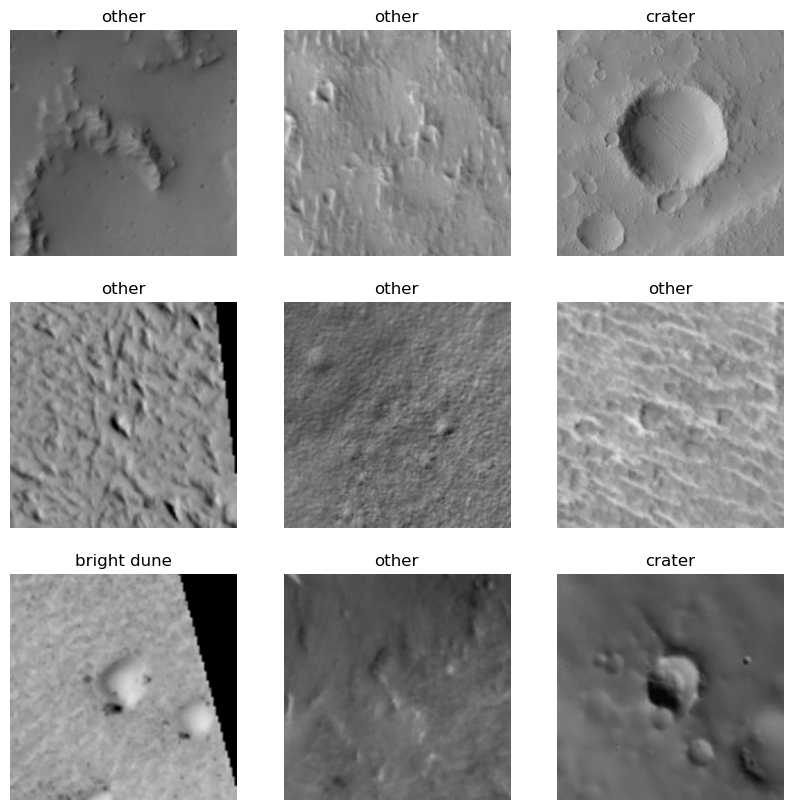

In [75]:
import matplotlib.pyplot as plt
class_names = ['other', 'crater', 'dark dune', 'slope streak', 'bright dune', 'impact ejecta', 'swiss cheese', 'spider']
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [48]:
from file_helpers import unpickle_from_file

In [49]:
import pandas as pd

df_labeled_images = unpickle_from_file('../data/processed_data/labeled_images.bin')

In [50]:
df_labeled_images.head()

,file_name,image,label
0,ESP_012810_0925_RED-0115-brt.jpg,"[[167, 167, 167, 168, 168, 168, 166, 164, 162,...",6
1,ESP_024646_2570_RED-0016-r270.jpg,"[[183, 180, 175, 167, 165, 164, 161, 163, 165,...",4
2,PSP_010087_1555_RED-0181-r90.jpg,"[[110, 108, 106, 106, 107, 105, 115, 115, 100,...",1
3,ESP_025151_1570_RED-0151-r90.jpg,"[[47, 45, 44, 45, 46, 46, 45, 44, 42, 44, 44, ...",0
4,ESP_012494_2050_RED-0044-r90.jpg,"[[114, 111, 115, 120, 120, 120, 120, 117, 118,...",0


In [52]:
df_labeled_images['image'][:3].values

array([array([[167, 167, 167, ..., 175, 175, 175],
              [168, 168, 169, ..., 177, 177, 177],
              [168, 168, 170, ..., 177, 177, 177],
              ...,
              [189, 187, 186, ..., 158, 160, 159],
              [194, 191, 190, ..., 156, 159, 158],
              [199, 197, 195, ..., 158, 161, 162]], dtype=uint8),
       array([[183, 180, 175, ..., 163, 166, 169],
              [185, 182, 177, ..., 166, 171, 175],
              [188, 184, 180, ..., 170, 177, 183],
              ...,
              [181, 181, 184, ..., 172, 169, 168],
              [178, 178, 180, ..., 175, 173, 172],
              [176, 176, 178, ..., 177, 175, 173]], dtype=uint8),
       array([[110, 108, 106, ...,  91,  99,  94],
              [111, 109, 108, ...,  94,  96,  94],
              [109, 107, 108, ..., 101,  93,  95],
              ...,
              [123, 123, 124, ..., 117, 116, 120],
              [125, 124, 126, ..., 114, 115, 120],
              [126, 126, 127, ..., 112, 113, 1

In [72]:
df_labeled_images['image'][0]

array([[167, 167, 167, ..., 175, 175, 175],
       [168, 168, 169, ..., 177, 177, 177],
       [168, 168, 170, ..., 177, 177, 177],
       ...,
       [189, 187, 186, ..., 158, 160, 159],
       [194, 191, 190, ..., 156, 159, 158],
       [199, 197, 195, ..., 158, 161, 162]], dtype=uint8)

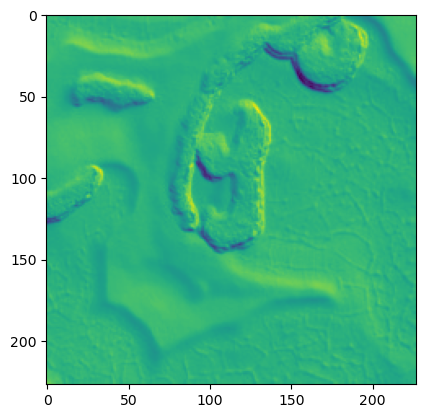

In [73]:
plt.imshow(df_labeled_images['image'][0])

In [66]:
new_pred = model.predict(df_labeled_images['image'][0])

ValueError: in user code:

    File "/home/eli/anaconda3/envs/hirise-images/lib/python3.9/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/eli/anaconda3/envs/hirise-images/lib/python3.9/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/eli/anaconda3/envs/hirise-images/lib/python3.9/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/eli/anaconda3/envs/hirise-images/lib/python3.9/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/eli/anaconda3/envs/hirise-images/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/eli/anaconda3/envs/hirise-images/lib/python3.9/site-packages/keras/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 227)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 227), dtype=uint8)
      • training=False
      • mask=None
